In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
db_params ={
    'dbname':'defaultdb',
    'user':'avnadmin',
    'password':'AVNS_-F_GkYlAt2Dv3T_w5Kr',
    'host':'pg-5525f8c-mutulikepher-5478.l.aivencloud.com',
    'port':'17902'  
}

In [3]:
engine = create_engine(f"postgresql://{db_params['user']}:{db_params['password']}@{db_params['host']}:{db_params['port']}/{db_params['dbname']}")

In [4]:
query = 'SELECT * FROM "FashSchema".fashion'

In [5]:
df=pd.read_sql(query,engine)

In [6]:
df.head()

,clothing_type,category,price,discount,shop_outlet,delivery_date,order_date,revenue,customer_name,customer_email
0,men,accessories,113.84,6.15,Photobug,2022-06-20,2023-08-06,1102.01,Alfy Piborn,apiborn0@squarespace.com
1,men,accessories,60.62,49.47,Jetwire,2024-02-06,2022-01-01,5521.65,Demetra Stutely,dstutely1@wired.com
2,children,shirts,119.19,41.14,Edgewire,2022-06-03,2022-11-14,7252.86,Giselle Ruegg,gruegg2@weebly.com
3,men,shoes,43.19,12.50,Twitterbridge,2022-11-19,2024-08-01,4866.12,Sven Loughlin,sloughlin3@surveymonkey.com
4,women,accessories,116.46,28.74,Zoomlounge,2024-12-17,2024-01-29,2009.40,Cesya Boustead,cboustead4@nps.gov


In [7]:
Top5Products = (
    df.groupby('category', as_index=False)['revenue']
    .sum()
    .rename(columns={'revenue': 'Total_Revenue'})
    .sort_values(by='Total_Revenue', ascending=False)
    .head(5)
)
print(Top5Products)

      category  Total_Revenue
0  accessories      136665.77
4        shoes      121015.97
2        pants       91024.52
1      dresses       76182.77
3       shirts       75476.40


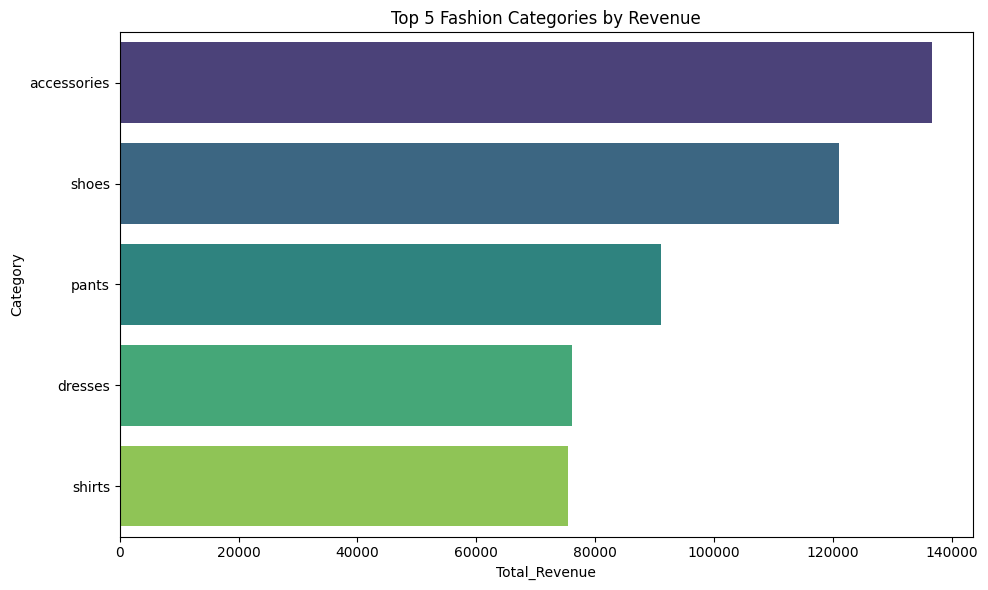

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(data=Top5Products, x='Total_Revenue', y='category', hue='category', palette='viridis', legend=False)
plt.title("Top 5 Fashion Categories by Revenue")
plt.xlabel("Total_Revenue")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

In [9]:
# Ensure 'delivery_date' is datetime type
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

# Extract year, month number, and month name
df['Year'] = df['delivery_date'].dt.year
df['Month Number'] = df['delivery_date'].dt.month
df['Month Name'] = df['delivery_date'].dt.strftime('%B')  # full month name

# Group by year + month
monthly_revenue = (
    df.groupby(['Year', 'Month Number', 'Month Name'], as_index=False)['revenue']
    .sum()
    .rename(columns={'revenue': 'Monthly Revenue'})
    .sort_values(['Year', 'Month Number'])
)

print(monthly_revenue)


    Year  Month Number Month Name  Monthly Revenue
0   2022             2   February          7599.88
1   2022             3      March         24638.98
2   2022             4      April         26944.72
3   2022             5        May         36081.55
4   2022             6       June         21329.57
5   2022             7       July         26309.58
6   2022             8     August         13195.89
7   2022             9  September         23792.60
8   2022            10    October         21164.94
9   2022            11   November         16124.82
10  2022            12   December          6874.89
11  2023             1    January          1672.06
12  2023             2   February         24048.19
13  2023             3      March         17481.66
14  2023             4      April          9106.99
15  2023             5        May         24172.89
16  2023             6       June          1448.99
17  2023             7       July           754.06
18  2023             8     Augu

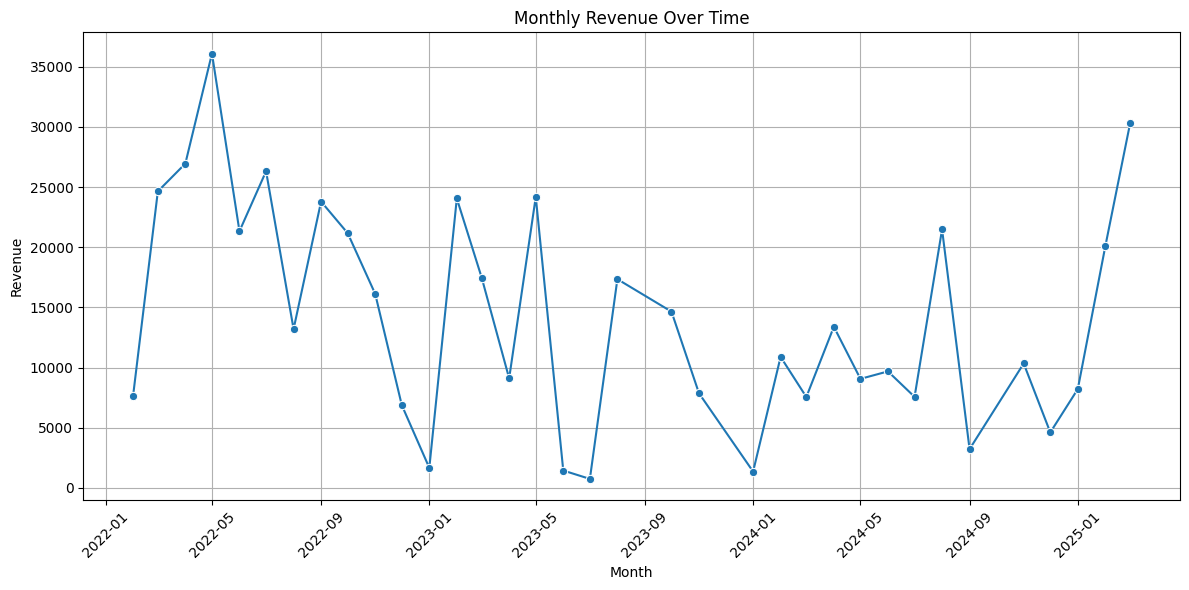

In [10]:
# Combine year and month number into a proper datetime for sorting
monthly_revenue['Year-Month'] = pd.to_datetime(
    monthly_revenue['Year'].astype(str) + '-' + monthly_revenue['Month Number'].astype(str)
)

# Sort by Year-Month just in case
monthly_revenue = monthly_revenue.sort_values('Year-Month')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='Year-Month', y='Monthly Revenue', marker='o')
plt.title("Monthly Revenue Over Time")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [11]:
df['order_date'] = pd.to_datetime(df['order_date'])
# Extract Day of the Week (0 = Sunday, 6 = Saturday)
df['Day of the Week'] = df['order_date'].dt.dayofweek  # 0 = Monday, 6 = Sunday if using `.dayofweek`, otherwise use `.weekday()`

# Group and summarize revenue
dow_sales = (
    df.groupby('Day of the Week', as_index=False)['revenue']
    .sum()
    .rename(columns={'revenue': 'Day of the Week Sales'})
    .sort_values('Day of the Week')
)
# Mapping: 0 = Monday ... 6 = Sunday
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_sales['Day Name'] = dow_sales['Day of the Week'].map(lambda x: day_names[x])


C:\Users\sangk\AppData\Local\Temp\ipykernel_15956\4000691096.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dow_sales, x='Day Name', y='Day of the Week Sales', palette='Set2')


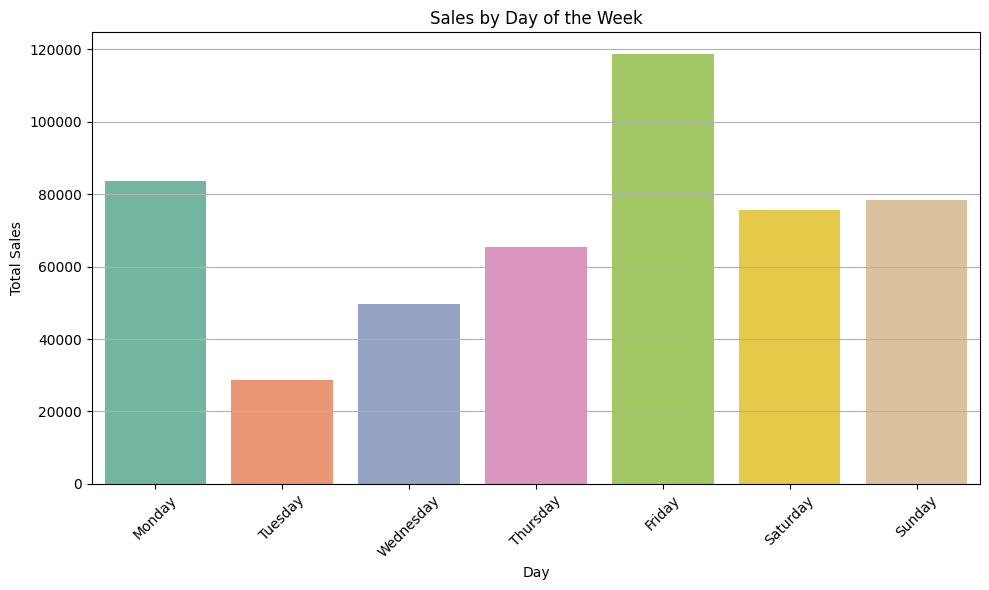

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=dow_sales, x='Day Name', y='Day of the Week Sales', palette='Set2')

plt.title("Sales by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [13]:
top_customers = (
    df.groupby('customer_name', as_index=False)['revenue']
    .sum()
    .rename(columns={'revenue': 'Total_Revenue'})
    .sort_values('Total_Revenue', ascending=False)
    .head(10)
)

C:\Users\sangk\AppData\Local\Temp\ipykernel_15956\4059582943.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='Total_Revenue', y='customer_name', palette='Blues_r')


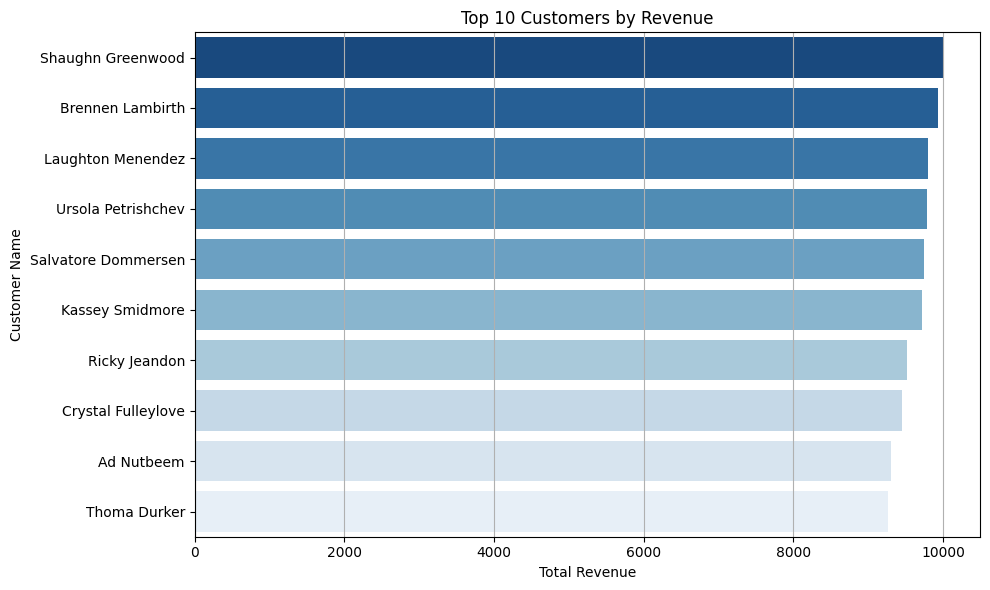

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='Total_Revenue', y='customer_name', palette='Blues_r')

plt.title("Top 10 Customers by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Customer Name")
plt.tight_layout()
plt.grid(axis='x')
plt.show()

In [15]:
customer_counts = (
    df.groupby('customer_name')
    .size()  # equivalent to COUNT(*)
    .reset_index(name='Transaction_Count')
    .sort_values('Transaction_Count')  # ascending by default
)

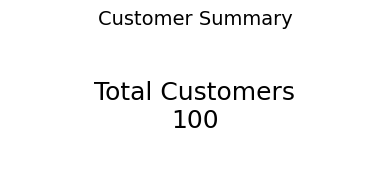

In [16]:
total_customers = customer_counts['customer_name'].nunique()

# Card-style plot
plt.figure(figsize=(4, 2))
plt.text(0.5, 0.5, f'Total Customers\n{total_customers}', 
         fontsize=18, ha='center', va='center')
plt.axis('off')  # Remove axes
plt.title("Customer Summary", fontsize=14)
plt.tight_layout()
plt.show()

In [17]:
df['order_date'] = pd.to_datetime(df['order_date'])

# Count number of purchases per customer
customer_orders = df.groupby('customer_name').size().reset_index(name='order_count')

# Classify customers
new_customers = customer_orders[customer_orders['order_count'] == 1]
repeat_customers = customer_orders[customer_orders['order_count'] > 1]

# Count them
new_count = new_customers.shape[0]
repeat_count = repeat_customers.shape[0]

In [18]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [20]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [21]:

# Create subplot with 1 row, 2 columns
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "indicator"}, {"type": "indicator"}]])

# New Customers Card
fig.add_trace(
    go.Indicator(
        mode="number",
        value=new_count,
        title={"text": "New Customers"},
        number={"font": {"size": 48, "color": "green"}},
    ),
    row=1, col=1
)

# Repeat Customers Card
fig.add_trace(
    go.Indicator(
        mode="number",
        value=repeat_count,
        title={"text": "Repeat Customers"},
        number={"font": {"size": 48, "color": "blue"}},
    ),
    row=1, col=2
)

fig.update_layout(
    title_text="Customer Breakdown",
    title_font_size=20,
    height=300,
    template="simple_white"
)

fig.show()


C:\Users\sangk\AppData\Local\Temp\ipykernel_15956\4110002601.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




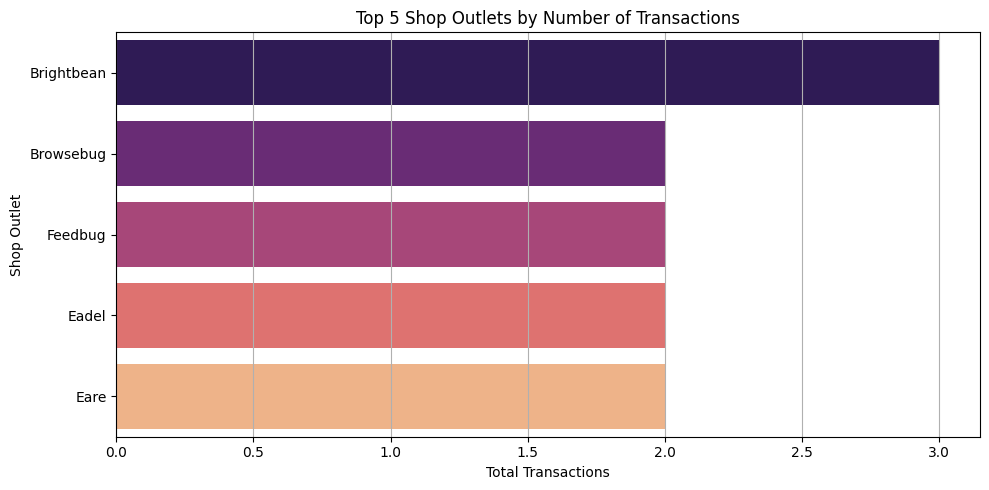

In [22]:
# Assuming df is your DataFrame and has a 'shop_outlet' column
shop_counts = (
    df.groupby('shop_outlet')
    .size()
    .reset_index(name='Total_Shops')
    .sort_values('Total_Shops', ascending=False)
)

# Limit to Top 5
top5_shops = shop_counts.head(5)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=top5_shops, x='Total_Shops', y='shop_outlet', palette='magma')

plt.title("Top 5 Shop Outlets by Number of Transactions")
plt.xlabel("Total Transactions")
plt.ylabel("Shop Outlet")
plt.tight_layout()
plt.grid(axis='x')
plt.show()

In [23]:
# Ensure 'order_date' is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Create 'day_type' column based on day of week
df['day_type'] = df['order_date'].dt.dayofweek.apply(lambda x: 'Weekend' if x in [5, 6] else 'Weekday')

# Group by 'day_type' and count sales
sales_by_day_type = (
    df.groupby('day_type')
    .size()
    .reset_index(name='TotalSales')
    .sort_values('TotalSales', ascending=False)
)


C:\Users\sangk\AppData\Local\Temp\ipykernel_15956\3761346555.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




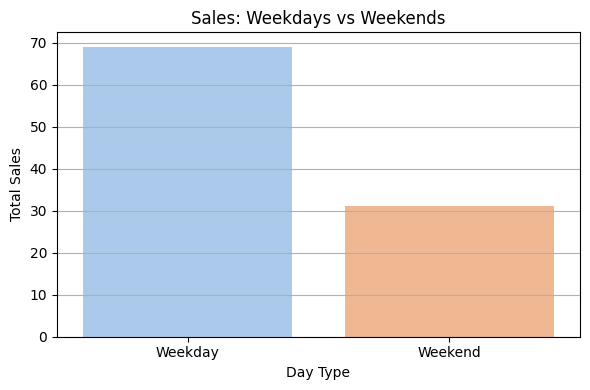

In [24]:
plt.figure(figsize=(6, 4))
sns.barplot(data=sales_by_day_type, x='day_type', y='TotalSales', palette='pastel')

plt.title("Sales: Weekdays vs Weekends")
plt.xlabel("Day Type")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [30]:
df

,clothing_type,category,price,discount,shop_outlet,delivery_date,order_date,revenue,customer_name,customer_email,Year,Month Number,Month Name,Day of the Week,day_type
0,men,accessories,113.84,6.15,Photobug,2022-06-20,2023-08-06,1102.01,Alfy Piborn,apiborn0@squarespace.com,2022,6,June,6,Weekend
1,men,accessories,60.62,49.47,Jetwire,2024-02-06,2022-01-01,5521.65,Demetra Stutely,dstutely1@wired.com,2024,2,February,5,Weekend
2,children,shirts,119.19,41.14,Edgewire,2022-06-03,2022-11-14,7252.86,Giselle Ruegg,gruegg2@weebly.com,2022,6,June,0,Weekday
3,men,shoes,43.19,12.50,Twitterbridge,2022-11-19,2024-08-01,4866.12,Sven Loughlin,sloughlin3@surveymonkey.com,2022,11,November,3,Weekday
4,women,accessories,116.46,28.74,Zoomlounge,2024-12-17,2024-01-29,2009.40,Cesya Boustead,cboustead4@nps.gov,2024,12,December,0,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,children,shoes,108.38,5.82,Rhybox,2024-08-31,2023-01-01,5215.14,Vinni Rasch,vrasch2n@wunderground.com,2024,8,August,6,Weekend
96,men,shirts,188.96,17.87,Skimia,2023-11-23,2022-04-14,4898.09,Hazel Pinching,hpinching2o@si.edu,2023,11,November,3,Weekday
97,women,accessories,11.88,38.74,Kimia,2022-03-13,2023-06-15,3527.45,Rancell Cristofari,rcristofari2p@fda.gov,2022,3,March,3,Weekday
98,children,shoes,141.65,35.04,Flipbug,2022-03-13,2025-01-11,2663.98,Beulah Pawfoot,bpawfoot2q@amazon.de,2022,3,March,5,Weekend


In [31]:
df.to_csv('fashion_data.csv', index=False)